#### Setup, description

In [ ]:
# v4, for 1D model, outlier clipping
# to 1Dmodel then umap decoded BRCA in d_
# Validation of quality of embedding
# 2022-10-13 Thursday
    # post 1D test at 5 epochs on some clipped outlier data, bladder
    # gen BRCA clipped set then run tests

# secondary questions:
    # where is the float32 conversion happening?

In [ ]:
# from V3 - Run raw vs. decoded samples into a UMAP
# Validation of quality of embedding

In [ ]:
# Ops notes
# latent space grid: 50 to 500 ?

In [2]:
pwd

'/Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/synthetic_TCGA_data_gen/a_data_structure'

In [1]:
%whos

Interactive namespace is empty.


In [ ]:
# target dir for the flat normed data: normed_data/
    # to the 1D model

In [3]:
ls

a_data_structure_00-Copy1.ipynb  blca_brca_flt64_sqrs/
a_data_structure_00.ipynb        intersect_00.ipynb
a_data_structure_01.ipynb        intersect_template.ipynb
a_data_structure_02.ipynb        mir_files/
a_data_structure_03.ipynb        mir_intrsct/
a_data_structure_04.ipynb        normed_data/


In [ ]:
# c module latent space sampling note
# two methods here - pairwise averaging and rejection method

# why not one-hot encode the labels?

In [6]:
%whos

Variable           Type        Data/Info
----------------------------------------
MinMaxScaler       type        <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
glob               module      <module 'glob' from '/Use<...>3/lib/python3.9/glob.py'>
np                 module      <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd                 module      <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
train_test_split   function    <function train_test_split at 0x7f7ec836b670>


In [4]:
date = '2022-10-13' # write normed raw, to 1D; square wraps to 2D model
                    # do outlier clipping? this means a dataset / VAE architechture grid
                            # put results to figure drive
                            # confirm previous UMAP result was technical artifact sampling uint8 converted samples (?)
                    # UMAP post inverse_MinMax (?)
                    
                    # RobustScaler has inverse_Transform also
                    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
                    
version = 'a_data_structure_04.ipynb' # version controlled repo

In [5]:
import glob as glob
import pandas as pd
from sklearn.model_selection import train_test_split # run multiple splits? inline with model
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [13]:
# get template code for the MinMax inverse, 
# to b-module model decoder for d-module UMAP input

In [6]:
# Read 26 cancer gene-expression files, add intersection file reas here
gxp_file_paths = sorted(glob.glob('/Users/karlberb/work/sample_count/smpl_gen/gexp_files/*.tsv'))

In [ ]:
gxp_file_paths

In [ ]:
# check pre-train / fine-tune across differing input file feauture counts
# add the log conversion prior to normalization
# zero-fill is blurring transfer learning performance evaluation, fix with 1Dconv version

### Resume 1D outlier clipping

In [ ]:
# idea - only apply log transform to upper segment of vals (?)

In [4]:
# Read bladder, full file, no intersect - to 1D and 2D
file  = pd.read_csv(gxp_file_paths[1],
                       sep = '\t',
                       index_col = 0)

In [20]:
blca  = pd.read_csv(gxp_file_paths[1],
                       sep = '\t',
                       index_col = 0)

In [41]:
blca.shape

(399, 20532)

In [5]:
file.index.name

'BLCA'

In [ ]:
# add * 1D conv model * then transformer to the grid

In [ ]:
# want two models, two cancers, two data types, data structures, ...
# get a decent grid going with the auto UMAP

In [9]:
# BRCA read
file  = pd.read_csv(gxp_file_paths[2],
                       sep = '\t',
                       index_col = 0)

In [ ]:
brca  = pd.read_csv(gxp_file_paths[2],
                       sep = '\t',
                       index_col = 0)

In [28]:
file.index.name

'BRCA'

In [ ]:
# First split, then norm - based on MNIST method

    #   *** Check against the 1D, model 3?
    
# Keras example method:    
https://keras.io/examples/generative/vae/    
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

In [7]:
train, test = train_test_split(file)

In [8]:
train.shape

(299, 20532)

In [9]:
test.shape

(100, 20532)

In [13]:
test.head(1)

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
BLCA,,,,,,,,,,,,,,,,,,,,,
TCGA-DK-AA76,BLCA_2,0.0,14.363,21.978,208.11,694.17,0,291.78,0.0,0.0,...,26.861,489.29,1345.7,7.3735,1593.2,2221.5,1450.5,873.76,166.43,0.5267


In [14]:
import matplotlib.pyplot as plt

In [10]:
scaler = MinMaxScaler()

In [ ]:
# The difference in the scaling methods from MNIST is that
# the MNIST maxes at 256 in both the train and test set
# wheras the gene expession is badly skewed with huge outliers
# so the max value could toggle back and forth between the train and test
# depending on ramdomness in the train / test split

In [11]:
train_norm = pd.DataFrame(scaler.fit_transform(
    train.iloc[:, 1:]), columns = test.columns[1:])

In [12]:
test_norm = pd.DataFrame(scaler.transform(
    test.iloc[:, 1:]), columns = test.columns[1:])

In [10]:
file.head(1)

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.0,16.364,12.932,52.15,408.08,0,1187.0,0.0,0.0,...,129.59,1007.8,1658.5,258.49,1208.4,3507.2,1894.9,1180.5,1.7233,0.0


In [15]:
file.shape

(995, 20532)

### Histograms

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)

(array([2.0000e+00, 2.1000e+01, 5.1000e+01, 2.3500e+02, 7.8100e+02,
        2.1000e+03, 4.5730e+03, 8.3390e+03, 1.2758e+04, 1.6363e+04,
        1.7345e+04, 1.4923e+04, 1.0920e+04, 6.4830e+03, 3.1070e+03,
        1.3810e+03, 4.5300e+02, 1.2200e+02, 3.6000e+01, 7.0000e+00]),
 array([3.20889223, 3.38336526, 3.55783829, 3.73231132, 3.90678435,
        4.08125738, 4.25573041, 4.43020344, 4.60467647, 4.7791495 ,
        4.95362253, 5.12809556, 5.30256859, 5.47704162, 5.65151465,
        5.82598768, 6.00046071, 6.17493374, 6.34940677, 6.5238798 ,
        6.69835283]),
 <BarContainer object of 20 artists>)

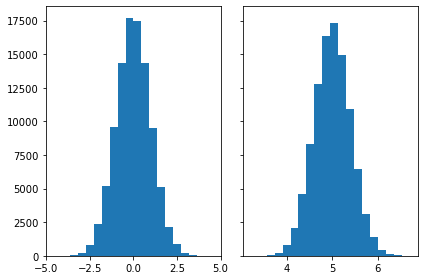

In [17]:
N_points = 100000
n_bins = 20

# Generate two normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)

In [22]:
dist1

array([-0.98584721,  0.05040332,  0.96828412, ..., -0.0276232 ,
        1.18599853,  0.48812025])

In [19]:
dist1.shape

(100000,)

In [34]:
len(row_lst)

8191869

In [42]:
399*20531

8191869

In [ ]:
row_lst

In [32]:
row_lst = []
for i, row_idx in enumerate(blca.index):
    row = blca.iloc[i, 1:]
    row_lst = row_lst + list(row)
    # print(row)
    # break

(array([8.188296e+06, 2.747000e+03, 4.750000e+02, 1.720000e+02,
        7.400000e+01, 3.100000e+01, 2.800000e+01, 1.300000e+01,
        9.000000e+00, 7.000000e+00, 4.000000e+00, 3.000000e+00,
        3.000000e+00, 1.000000e+00, 0.000000e+00, 2.000000e+00,
        0.000000e+00, 0.000000e+00, 2.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([      0.        ,   80943.33333333,  161886.66666667,
         242830.        ,  323773.33333333,  404716.66666667,
         485660.        ,  566603.33333333,  647546.66666667,
         728490.        ,  809433.33333333,  890376.66666667,
         971320.        , 1052263.33333333, 1133206.66666667,
        1214150.        , 1295093.33333333, 1376036.66666667,
        1456980.        , 1537923.33333333, 1618866.66666667,
        1699810.        , 1780753.33333333, 1861696.66666667,
        1942640.  

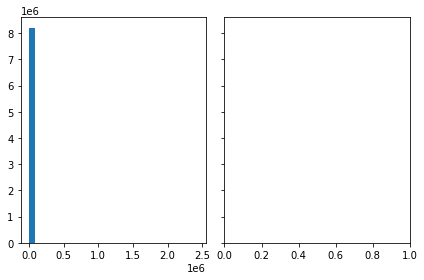

In [33]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(row_lst, bins=30)

In [37]:
import scipy

In [38]:
scipy.stats.describe(row_lst)

DescribeResult(nobs=8191869, minmax=(0.0, 2428300.0), mean=970.4641287884241, variance=23542200.880028173, skewness=75.16590364480143, kurtosis=17232.19879738149)

### Outlier clipping

In [ ]:
# keep these in a table, write table

    # write companion figures (histograms)

    # write files and send to one drive
    
    # target dir is normalized_data/square for 2D
        # and normalized_data/flat for 1D
    
    # BLCA and BRCA - 2, start with bladder all the way through MinMax
    # square and oneD - 2
    
        # raw - done, in MinMax, Xs are arrarys, ys are .tsvs
            # bladder, done with minmax
        
        # clip at 1M - 
        # clip at 100k
        # clip at 10k
        # clip at 1k
        # clip at 500
        # clip at 250
        
        # log transform
        # log above 1k
        
        # clip log combinations
        
    # all of the above should be MinMaxed
    
    # and Robust scaled
    
        # sequence of fit, transform, and fit_transform
        https://datascience.stackexchange.com/questions/54908/data-normalization-before-or-after-train-test-split
        
        # Norming before split is information leakage to test from train

In [ ]:
# wrapped versions in line with flat versions (?)

#### BLCA MinMax flat, x and y (control)

In [61]:
cohort = 'BLCA'
d_shape = 'flat' # or square
out_cut = 'no_otlr_cut'
method = 'MinMax' # already know its flat by the dir, should probaly just name
Xy = 'X'

train, test = train_test_split(blca)
scaler = MinMaxScaler()

# Train
train_norm = pd.DataFrame( # check, all train
    scaler.fit_transform(train.iloc[:, 1:]), # check, fit
    columns = train.columns[1:],
    index = train.index)
train_norm.to_csv('normalized_data/flat/'+cohort+'_X_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

train_y = pd.DataFrame(train.Labels)
train_y.to_csv('normalized_data/flat/'+cohort+'_y_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

# Test
test_norm = pd.DataFrame( # check, all test
    scaler.transform(test.iloc[:, 1:]), # check, fit
    columns = test.columns[1:],
    index = test.index)
test_norm.to_csv('normalized_data/flat/'+cohort+'_X_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

test_y = pd.DataFrame(test.Labels)
test_y.to_csv('normalized_data/flat/'+cohort+'_y_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

#### BLCA 1M otlr cut MinMax flat

In [121]:
cohort = 'BLCA'
d_shape = 'flat' # or square
out_cut = '1M_otlr_cut' # wont overwrite uncut files
method = 'MinMax' # already know its flat by the dir, should probaly just name

otlr_thresh = 1000000

train, test = train_test_split(blca)

train_y = pd.DataFrame(train.Labels)
train_y.to_csv('normalized_data/flat/'+cohort+'_y_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

test_y = pd.DataFrame(test.Labels)
test_y.to_csv('normalized_data/flat/'+cohort+'_y_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

scaler = MinMaxScaler()

# Train
train.drop(columns = 'Labels', inplace = True)
train.mask(train > otlr_thresh, otlr_thresh, inplace = True)
train_norm = pd.DataFrame( # check, all train
    scaler.fit_transform(train.iloc[:, 1:]), # check, fit
    columns = train.columns[1:],
    index = train.index)
train_norm.to_csv('normalized_data/flat/'+cohort+'_X_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

# Test
test.drop(columns = 'Labels', inplace = True)
test.mask(train > otlr_thresh, otlr_thresh, inplace = True)
test_norm = pd.DataFrame( # check, all test
    scaler.transform(test.iloc[:, 1:]), # check, fit
    columns = test.columns[1:],
    index = test.index)
test_norm.to_csv('normalized_data/flat/'+cohort+'_X_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

##### outlier devel

In [118]:
train.drop(columns = 'Labels', inplace = True)

In [119]:
train.mask(train > 1000000, 1000000, inplace = True)

In [120]:
train.max().max()

1000000.0

In [ ]:
.mask(blca > 1000000, 1000000)

In [116]:
train.drop(columns = 'Labels').max().max()

2428300.0

In [108]:
train, test = train_test_split(blca)

In [111]:
train.iloc[:,1:].max().max()

2428300.0

In [112]:
test.iloc[:,1:].max().max()

1256300.0

In [104]:
blca.iloc[:,1:].max().max()

2428300.0

In [97]:
blcaX = blca.iloc[:,1:].copy()

In [87]:
blcaX.max().max()

2428300.0

In [107]:
blca.iloc[:,1:].mask(blca > 1000000, 1000000)

TypeError: '>' not supported between instances of 'str' and 'int'

In [101]:
blcaX.mask(blcaX > 1000000, 1000000, inplace = True)

In [105]:
blcaX.max().max()

1000000.0

In [ ]:
mask_point = 100000

#### BLCA 100k otlr cut MinMax flat

In [122]:
cohort = 'BLCA'
d_shape = 'flat' # or square
out_cut = '100k_otlr_cut' # wont overwrite uncut files
method = 'MinMax' # already know its flat by the dir, should probaly just name

otlr_thresh = 100000

train, test = train_test_split(blca)

train_y = pd.DataFrame(train.Labels)
train_y.to_csv('normalized_data/flat/'+cohort+'_y_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

test_y = pd.DataFrame(test.Labels)
test_y.to_csv('normalized_data/flat/'+cohort+'_y_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

scaler = MinMaxScaler()

# Train
train.drop(columns = 'Labels', inplace = True)
train.mask(train > otlr_thresh, otlr_thresh, inplace = True)
train_norm = pd.DataFrame( # check, all train
    scaler.fit_transform(train.iloc[:, 1:]), # check, fit
    columns = train.columns[1:],
    index = train.index)
train_norm.to_csv('normalized_data/flat/'+cohort+'_X_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

# Test
test.drop(columns = 'Labels', inplace = True)
test.mask(train > otlr_thresh, otlr_thresh, inplace = True)
test_norm = pd.DataFrame( # check, all test
    scaler.transform(test.iloc[:, 1:]), # check, fit
    columns = test.columns[1:],
    index = test.index)
test_norm.to_csv('normalized_data/flat/'+cohort+'_X_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

#### BLCA 10k otlr cut MinMax flat

In [123]:
cohort = 'BLCA'
d_shape = 'flat' # or square
out_cut = '10k_otlr_cut' # wont overwrite uncut files
method = 'MinMax' # already know its flat by the dir, should probaly just name

otlr_thresh = 10000

train, test = train_test_split(blca)

train_y = pd.DataFrame(train.Labels)
train_y.to_csv('normalized_data/flat/'+cohort+'_y_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

test_y = pd.DataFrame(test.Labels)
test_y.to_csv('normalized_data/flat/'+cohort+'_y_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

scaler = MinMaxScaler()

# Train
train.drop(columns = 'Labels', inplace = True)
train.mask(train > otlr_thresh, otlr_thresh, inplace = True)
train_norm = pd.DataFrame( # check, all train
    scaler.fit_transform(train.iloc[:, 1:]), # check, fit
    columns = train.columns[1:],
    index = train.index)
train_norm.to_csv('normalized_data/flat/'+cohort+'_X_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

# Test
test.drop(columns = 'Labels', inplace = True)
test.mask(train > otlr_thresh, otlr_thresh, inplace = True)
test_norm = pd.DataFrame( # check, all test
    scaler.transform(test.iloc[:, 1:]), # check, fit
    columns = test.columns[1:],
    index = test.index)
test_norm.to_csv('normalized_data/flat/'+cohort+'_X_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

#### BLCA 1k otlr cut MinMax flat

In [ ]:
cohort = 'BLCA'
d_shape = 'flat' # or square
out_cut = '1k_otlr_cut' # wont overwrite uncut files
method = 'MinMax' # already know its flat by the dir, should probaly just name

otlr_thresh = 1000

train, test = train_test_split(blca)

train_y = pd.DataFrame(train.Labels)
train_y.to_csv('normalized_data/flat/'+cohort+'_y_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

test_y = pd.DataFrame(test.Labels)
test_y.to_csv('normalized_data/flat/'+cohort+'_y_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

scaler = MinMaxScaler()

# Train
train.drop(columns = 'Labels', inplace = True)
train.mask(train > otlr_thresh, otlr_thresh, inplace = True)
train_norm = pd.DataFrame( # check, all train
    scaler.fit_transform(train.iloc[:, 1:]), # check, fit
    columns = train.columns[1:],
    index = train.index)
train_norm.to_csv('normalized_data/flat/'+cohort+'_X_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

# Test
test.drop(columns = 'Labels', inplace = True)
test.mask(train > otlr_thresh, otlr_thresh, inplace = True)
test_norm = pd.DataFrame( # check, all test
    scaler.transform(test.iloc[:, 1:]), # check, fit
    columns = test.columns[1:],
    index = test.index)
test_norm.to_csv('normalized_data/flat/'+cohort+'_X_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

#### BLCA 500 otlr cut MinMax flat

In [125]:
cohort = 'BLCA'
d_shape = 'flat' # or square
out_cut = '500_otlr_cut' # wont overwrite uncut files
method = 'MinMax' # already know its flat by the dir, should probaly just name

otlr_thresh = 500

train, test = train_test_split(blca)

train_y = pd.DataFrame(train.Labels)
train_y.to_csv('normalized_data/flat/'+cohort+'_y_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

test_y = pd.DataFrame(test.Labels)
test_y.to_csv('normalized_data/flat/'+cohort+'_y_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

scaler = MinMaxScaler()

# Train
train.drop(columns = 'Labels', inplace = True)
train.mask(train > otlr_thresh, otlr_thresh, inplace = True)
train_norm = pd.DataFrame( # check, all train
    scaler.fit_transform(train.iloc[:, 1:]), # check, fit
    columns = train.columns[1:],
    index = train.index)
train_norm.to_csv('normalized_data/flat/'+cohort+'_X_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

# Test
test.drop(columns = 'Labels', inplace = True)
test.mask(train > otlr_thresh, otlr_thresh, inplace = True)
test_norm = pd.DataFrame( # check, all test
    scaler.transform(test.iloc[:, 1:]), # check, fit
    columns = test.columns[1:],
    index = test.index)
test_norm.to_csv('normalized_data/flat/'+cohort+'_X_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

#### BLCA 250 otlr cut MinMax flat

In [126]:
cohort = 'BLCA'
d_shape = 'flat' # or square
out_cut = '250_otlr_cut' # wont overwrite uncut files
method = 'MinMax' # already know its flat by the dir, should probaly just name

otlr_thresh = 250

train, test = train_test_split(blca)

train_y = pd.DataFrame(train.Labels)
train_y.to_csv('normalized_data/flat/'+cohort+'_y_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

test_y = pd.DataFrame(test.Labels)
test_y.to_csv('normalized_data/flat/'+cohort+'_y_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

scaler = MinMaxScaler()

# Train
train.drop(columns = 'Labels', inplace = True)
train.mask(train > otlr_thresh, otlr_thresh, inplace = True)
train_norm = pd.DataFrame( # check, all train
    scaler.fit_transform(train.iloc[:, 1:]), # check, fit
    columns = train.columns[1:],
    index = train.index)
train_norm.to_csv('normalized_data/flat/'+cohort+'_X_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

# Test
test.drop(columns = 'Labels', inplace = True)
test.mask(train > otlr_thresh, otlr_thresh, inplace = True)
test_norm = pd.DataFrame( # check, all test
    scaler.transform(test.iloc[:, 1:]), # check, fit
    columns = test.columns[1:],
    index = test.index)
test_norm.to_csv('normalized_data/flat/'+cohort+'_X_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

#### BRCA

Begin Thursday 2022-10-13  
Load pacakages and gexp path above

##### MinMax() on raw data, control

In [ ]:
# should probably start a Robust Scaler version, use stats plots!

In [8]:
brca = pd.read_csv(gxp_file_paths[2],
                       sep = '\t',
                       index_col = 0)

In [10]:
cohort = 'BRCA'
d_shape = 'flat' # or square
out_cut = 'no_otlr_cut'
method = 'MinMax' # already know its flat by the dir, should probaly just name

In [11]:
cohort # to file name

'BRCA'

In [12]:
brca.index.name # to function

'BRCA'

In [13]:
# no-outlier threshold, control
train, test = train_test_split(brca) # check, taking <brca>, to 1Dmodel fine-tune
scaler = MinMaxScaler() # get fresh Scaler object

# Train
train_norm = pd.DataFrame( # check, all train
    scaler.fit_transform(train.iloc[:, 1:]), # check, fit
    columns = train.columns[1:],
    index = train.index)
train_norm.to_csv('normalized_data/flat/'+cohort+'_X_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

train_y = pd.DataFrame(train.Labels)
train_y.to_csv('normalized_data/flat/'+cohort+'_y_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

# Test
test_norm = pd.DataFrame( # check, all test
    scaler.transform(test.iloc[:, 1:]), # check, fit
    columns = test.columns[1:],
    index = test.index)
test_norm.to_csv('normalized_data/flat/'+cohort+'_X_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

test_y = pd.DataFrame(test.Labels)
test_y.to_csv('normalized_data/flat/'+cohort+'_y_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

In [16]:
train_norm.shape

(746, 20531)

In [22]:
import time

In [20]:
import scipy

In [25]:
train.index.name

'BRCA'

In [26]:
strt = time.time()
row_lst = []
for i, row_idx in enumerate(train.index):
    row = train.iloc[i, 1:]
    row_lst = row_lst + list(row)
end = time.time() - strt
print(end)
print(out_cut)
scipy.stats.describe(row_lst)

no_otlr_cut


DescribeResult(nobs=15316126, minmax=(0.0, 2066000.0), mean=932.9513480047945, variance=18752545.639887463, skewness=78.90418150944474, kurtosis=18625.95286690679)

In [ ]:
# Observation: variance is 18.7 million

In [27]:
end

87.44524383544922

In [18]:
train_norm.index.name

'BRCA'

In [23]:
# After normalizing BRCA with no outlier cut
strt = time.time()
row_lst = []
for i, row_idx in enumerate(train_norm.index):
    row = train_norm.iloc[i, 1:]
    row_lst = row_lst + list(row)
end = time.time() - strt
print(out_cut)
scipy.stats.describe(row_lst)

no_otlr_cut


DescribeResult(nobs=15315380, minmax=(0.0, 1.0000000000000002), mean=0.11705726648350953, variance=0.01868082859041636, skewness=1.9346505076559235, kurtosis=5.5211249399922515)

In [24]:
end

78.27142715454102

##### Auto-clip BRCA, end control MinMax

In [ ]:
time.time()

In [ ]:
        # clip at 1M - 
        # clip at 100k
        # clip at 10k
        # clip at 1k
        # clip at 500
        # clip at 250

In [29]:
otlr_thresh = 1000000 # six zeros
out_cut = '1M_otlr_cut'

In [36]:
otlr_thresh = 100000 # five
out_cut = '100k_otlr_cut'

In [41]:
otlr_thresh = 10000 # four
out_cut = '10k_otlr_cut'

In [46]:
otlr_thresh = 1000 # three
out_cut = '1k_otlr_cut'

In [51]:
otlr_thresh = 500 # 
out_cut = '500_otlr_cut'

In [56]:
otlr_thresh = 250 # 
out_cut = '250_otlr_cut'

In [30]:
cohort # to file name

'BRCA'

In [31]:
brca.index.name # to function

'BRCA'

In [57]:
print(otlr_thresh)
out_cut

250


'250_otlr_cut'

In [58]:
# BRCA
train, test = train_test_split(brca) # check 2, this is <brca>, to fine tune *

train_y = pd.DataFrame(train.Labels)
train_y.to_csv('normalized_data/flat/'+cohort+'_y_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

test_y = pd.DataFrame(test.Labels)
test_y.to_csv('normalized_data/flat/'+cohort+'_y_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

scaler = MinMaxScaler()

# Train
train.drop(columns = 'Labels', inplace = True)
train.mask(train > otlr_thresh, otlr_thresh, inplace = True) # should feed the first four moment description
train_norm = pd.DataFrame( # check, all train
    scaler.fit_transform(train.iloc[:, 1:]), # check, fit
    columns = train.columns[1:],
    index = train.index)
train_norm.to_csv('normalized_data/flat/'+cohort+'_X_train_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

# Test
test.drop(columns = 'Labels', inplace = True)
test.mask(test > otlr_thresh, otlr_thresh, inplace = True) # template here for BLCA re-run, just delete
test_norm = pd.DataFrame( # check, all test                 # all the individual and mimic semi-auto here
    scaler.transform(test.iloc[:, 1:]), # check, fit
    columns = test.columns[1:],
    index = test.index)
test_norm.to_csv('normalized_data/flat/'+cohort+'_X_test_'+d_shape+'_'+out_cut+'_'+method+'.tsv', sep = '\t')

In [ ]:
# for BLCA stats automation
rw_otlr 

In [64]:
import matplotlib.pyplot as plt

/var/folders/5v/88tvwqd94gs4dfr3h6rt1_w0qd13bg/T/ipykernel_59050/3122500769.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


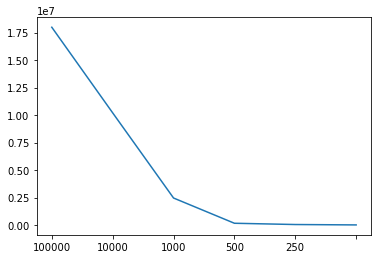

In [74]:
fig, ax = plt.subplots()
fig.canvas.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = step_vals

ax.set_xticklabels(labels)
plt.plot(step, var)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

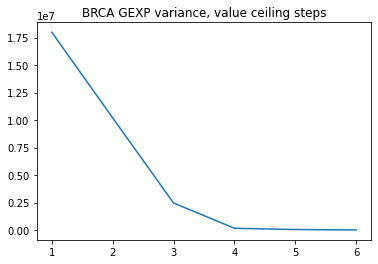

In [72]:
plt.plot(step, var)
plt.title('BRCA GEXP variance, value ceiling steps')
plt.set_xticklabels(step_vals)

In [62]:
var = [17986453, 10203386, 2459423, 163595, 48658, 12851]

In [66]:
step = [1,2,3,4,5,6]

In [68]:
step_vals = [1000000,100000,10000,1000,500,250]

In [59]:
row_lst = []
for i, row_idx in enumerate(train.index):
    row = train.iloc[i, 1:]
    row_lst = row_lst + list(row)
print(cohort)
print('Raw with outlier clip')
print(out_cut)
scipy.stats.describe(row_lst)

BRCA
Raw with outlier clip
250_otlr_cut


DescribeResult(nobs=15315380, minmax=(0.0, 250.0), mean=140.48840810331146, variance=12851.410580132115, skewness=-0.2049842854800381, kurtosis=-1.8269733832997324)

In [60]:
row_lst = []
for i, row_idx in enumerate(train_norm.index):
    row = train_norm.iloc[i, 1:]
    row_lst = row_lst + list(row)
print(cohort)
print('Normalized after outlier clip')
print(out_cut)
scipy.stats.describe(row_lst)

BRCA
Normalized after outlier clip
250_otlr_cut


DescribeResult(nobs=15314634, minmax=(0.0, 1.0000000000000036), mean=0.405619690935507, variance=0.1972103642240764, skewness=0.43836666643625277, kurtosis=-1.6549957552084333)

In [54]:
row_lst = []
for i, row_idx in enumerate(train.index):
    row = train.iloc[i, 1:]
    row_lst = row_lst + list(row)
print(cohort)
print('Raw with outlier clip')
print(out_cut)
scipy.stats.describe(row_lst)

BRCA
Raw with outlier clip
500_otlr_cut


DescribeResult(nobs=15315380, minmax=(0.0, 500.0), mean=241.05509580375426, variance=48658.35419487813, skewness=0.12213648924580703, kurtosis=-1.7950992896889257)

In [55]:
row_lst = []
for i, row_idx in enumerate(train_norm.index):
    row = train_norm.iloc[i, 1:]
    row_lst = row_lst + list(row)
print(cohort)
print('Normalized after outlier clip')
print(out_cut)
scipy.stats.describe(row_lst)

BRCA
Normalized after outlier clip
500_otlr_cut


DescribeResult(nobs=15314634, minmax=(0.0, 1.0000000000000036), mean=0.40577322273735605, variance=0.18128754945733846, skewness=0.45839239340651766, kurtosis=-1.5649190249256275)

In [49]:
row_lst = []
for i, row_idx in enumerate(train.index):
    row = train.iloc[i, 1:]
    row_lst = row_lst + list(row)
print(cohort)
print('Raw with outlier clip')
print(out_cut)
scipy.stats.describe(row_lst)

BRCA
Raw with outlier clip
1k_otlr_cut


DescribeResult(nobs=15315380, minmax=(0.0, 1000.0), mean=377.8666507538699, variance=163595.88889559446, skewness=0.5756221820470301, kurtosis=-1.3559671987346495)

In [50]:
row_lst = []
for i, row_idx in enumerate(train_norm.index):
    row = train_norm.iloc[i, 1:]
    row_lst = row_lst + list(row)
print(cohort)
print('Normalized after outlier clip')
print(out_cut)
scipy.stats.describe(row_lst)

BRCA
Normalized after outlier clip
1k_otlr_cut


DescribeResult(nobs=15314634, minmax=(0.0, 1.0000000000000009), mean=0.34674516106293196, variance=0.14815790751839125, skewness=0.7665469296574272, kurtosis=-1.0353257269113318)

In [44]:
row_lst = []
for i, row_idx in enumerate(train.index):
    row = train.iloc[i, 1:]
    row_lst = row_lst + list(row)
print(cohort)
print('Raw with outlier clip')
print(out_cut)
scipy.stats.describe(row_lst)

BRCA
Raw with outlier clip
10k_otlr_cut


DescribeResult(nobs=15315380, minmax=(0.0, 10000.0), mean=780.8830791659948, variance=2459423.868119471, skewness=3.7841338184636926, kurtosis=16.553251533898965)

In [45]:
row_lst = []
for i, row_idx in enumerate(train_norm.index):
    row = train_norm.iloc[i, 1:]
    row_lst = row_lst + list(row)
print(cohort)
print('Normalized after outlier clip')
print(out_cut)
scipy.stats.describe(row_lst)

BRCA
Normalized after outlier clip
10k_otlr_cut


DescribeResult(nobs=15314634, minmax=(0.0, 1.000000000000007), mean=0.13887578420009583, variance=0.031466282089254685, skewness=2.382276371906509, kurtosis=7.287259460489784)

In [39]:
row_lst = []
for i, row_idx in enumerate(train.index):
    row = train.iloc[i, 1:]
    row_lst = row_lst + list(row)
print(cohort)
print('Raw with outlier clip')
print(out_cut)
scipy.stats.describe(row_lst)

BRCA
Raw with outlier clip
100k_otlr_cut


DescribeResult(nobs=15315380, minmax=(0.0, 100000.0), mean=916.9001066248707, variance=10203386.90939204, skewness=15.846155242386734, kurtosis=374.3922146229971)

In [40]:
row_lst = []
for i, row_idx in enumerate(train_norm.index):
    row = train_norm.iloc[i, 1:]
    row_lst = row_lst + list(row)
print(cohort)
print('Normalized after outlier clip')
print(out_cut)
scipy.stats.describe(row_lst)

BRCA
Normalized after outlier clip
100k_otlr_cut


DescribeResult(nobs=15314634, minmax=(0.0, 1.0000000000000002), mean=0.11715793082062838, variance=0.019056305368105365, skewness=1.9754585328817476, kurtosis=5.750754312993944)

In [34]:
row_lst = []
for i, row_idx in enumerate(train.index):
    row = train.iloc[i, 1:]
    row_lst = row_lst + list(row)
print(cohort)
print('Raw with outlier clip')
print(out_cut)
scipy.stats.describe(row_lst)

BRCA
Raw with outlier clip
1M_otlr_cut


DescribeResult(nobs=15315380, minmax=(0.0, 1000000.0), mean=932.8913369478428, variance=17986453.773315974, skewness=59.314188788254796, kurtosis=8390.732315352583)

In [35]:
row_lst = []
for i, row_idx in enumerate(train_norm.index):
    row = train_norm.iloc[i, 1:]
    row_lst = row_lst + list(row)
print(cohort)
print('Normalized after outlier clip')
print(out_cut)
scipy.stats.describe(row_lst)

BRCA
Normalized after outlier clip
1M_otlr_cut


DescribeResult(nobs=15314634, minmax=(0.0, 1.0000000000000002), mean=0.11712291804306872, variance=0.01878651102802238, skewness=1.9362984304645297, kurtosis=5.500601778131932)

In [ ]:
#notes

In [ ]:
# Apply RobustScaler to Drug Response

In [ ]:
# old notes

In [ ]:
# Need to generate in-line with model run
# Need to run the UMAP in-line with model too

#### Target output dirs for 2D model data sets
sample_gen/synthetic_TCGA_data_gen/a_data_structure/blca_brca_square_full/MinMax  
./a_data_structure/blca_brca_square_full/clip_outlrs  
./a_data_structure/blca_brca_square_full/log_xfrm  

In [ ]:
# target dirs for three sets of square files: blca_brca_flt64_sqrs/
    # to the 2D model
    
# compare pre-post layer error fix on 2D model from original example ?

##### Notes

In [ ]:
# notes
    # use the same train test split for all file generations?
    
    # use multiple train test splits for each file set?

# Devel

In [ ]:
https://www.geeksforgeeks.org/log-and-natural-logarithmic-value-of-a-column-in-pandas-python/ 
    log(), log2(), and log10() 

In [ ]:
# Improve the statistics on the raw data
    # kurtosis, skew
    # fine-grained histograms

In [ ]:
https://stats.stackexchange.com/questions/402470/how-can-i-use-scaling-and-log-transforming-together
X_train = np.log(X_train)

In [ ]:
# Summary of normalization, context of outliers

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

# vs
scaler = MinMaxScaler()
train_norm = pd.DataFrame(scaler.fit_transform(
    train.iloc[:, 1:]), columns = train.columns[1:]) # <---- error; also, is this where the columns get put on the train_norm object
test_norm = pd.DataFrame(scaler.transform(          # column names match though, so should not effect results
    test.iloc[:, 1:]), columns = test.columns[1:])  # This seems artificial

# try (after running train / test split)
train, test = train_test_split(file)
scaler = MinMaxScaler()
scaler.fit(file)

In [24]:
train_norm.to_csv('normed_data/train_norm.tsv',
                  sep = '\t')

In [25]:
test_norm.to_csv('normed_data/test_norm.tsv',
                  sep = '\t')

In [ ]:
# function devel

In [25]:
X_list = []
y_list = []

In [27]:
for j, sample in enumerate(splt):
    break

In [30]:
sample.shape

(20531,)

In [28]:
j

0

In [35]:
gene_row = list(sample)

In [37]:
len(gene_row)

20531

In [38]:
filler = gene_row + (20736 - len(gene_row)) * [0]

In [39]:
len(filler)

20736

In [40]:
flr_ary = np.array(filler)

In [42]:
flr_ary.shape

(20736,)

In [44]:
flr_ary_sqr = flr_ary.reshape(144,144,1)

In [ ]:
# Wednesday afternoon, v4 devel, this is for the square

In [ ]:
def wrap(splt):
    X_list = []
    y_list = []
    for j, sample in enumerate(splt.index):
        gene_row = list(sample)
        filler = gene_row + (20736 - len(gene_row)) * [0]
        flr_ary = np.array(filler)
        flr_ary_sqr = flr_ary.reshape(144,144,1)
        X_list.append(flr_ary_sqr)
    return(X)

In [ ]:
# v2 version

In [29]:
# Wrap BLCA for pretrain, then BRCA
# Main question here is whether to run MinMax
# on train and test independently
    # mirror the invert function regardless

print('starting '+file.index.name)

train, test = train_test_split(file) # normed above, v3 test

# train.iloc[:,1:] = MinMaxScaler().fit_transform(
#     train.iloc[:,1:]) # or just run on the file - done

# test.iloc[:,1:] = MinMaxScaler().fit_transform(test.iloc[:,1:])

trn_empty = [] # append model-formatted numpy arrays of gexp values
trn_y_list = []

for j, sample in enumerate(train.index): # go through the train object
    gene_row = list(train.iloc[j,1:]) # extract sample gene expression

    base = np.array(gene_row + (
        20736 - len(
            # gene_row)) * [0],dtype=np.uint8).reshape(144,144,1)
                        gene_row)) * [0]).reshape(144,144,1)

    trn_empty.append(base)
    y = train.iloc[j,0]
    trn_y_list.append(y)
X_train_new  = np.array(trn_empty)
# formatted = np.array(trn_empty)
# formatted = formatted/255 # This normalization for unint 8, pull in the MinMaxScaler
        # for data structure version one
        # Start version one of this d_struct from here
        # Send better f64 files to model b_mod_v1, time for outlier clipping, log x-form, etc

      # END version 0 <------------- r0 png loss curve for BLCA in model dir
    
    # coordinate corrected versions in v2 of data structure and model
    
# formatted = MinMaxScaler(formatted) # Completly wrong

# X_train_new = MinMaxScaler().fit_transform(formatted) # last fail

# X_train_new = formatted

print('MinMax train loop done')

# Start processing the test data, same as above [toggling for MinMax test]

tst_empty = []
tst_y_list = []

test.iloc[:,1:] = MinMaxScaler().fit_transform(test.iloc[:,1:])

for j, sample in enumerate(test.index):
    gene_row = list(test.iloc[j,1:])
    base = np.array(gene_row + (
        20736 - len(
            # gene_row)) * [0],
                        gene_row)) * [0]
                    # dtype=np.uint8 # <---
                   ).reshape(144,144,1)
    tst_empty.append(base)
    y = test.iloc[j,0]
    tst_y_list.append(y)
X_test_new = np.array(tst_empty)
# formatted = formatted/255 # test normalization
# X_test_new = formatted

print('done')

starting BRCA
MinMax train loop done
done


In [24]:
file.index.name # Still losing index, dont care right now

'BLCA'

In [30]:
file.index.name # Check, run 2

'BRCA'

In [31]:
np.save(
    'blca_brca_flt64_sqrs/MinMax/'+file.index.name+'_MinMax_X_trn',
    X_train_new)

np.save(
    'blca_brca_flt64_sqrs/MinMax/'+file.index.name+'_MinMax_X_tst.npy', # robust against ext incl
        X_test_new)

In [32]:
trn_y_out = pd.DataFrame(trn_y_list,columns = ['Labels'])
trn_y_out.to_csv('blca_brca_flt64_sqrs/MinMax/'+file.index.name+'_MinMax_y_trn.tsv',
                sep = '\t',
                )
tst_y_out = pd.DataFrame(tst_y_list,columns = ['Labels'])
tst_y_out.to_csv('blca_brca_flt64_sqrs/MinMax/'+file.index.name+'_MinMax_y_tst.tsv',
                sep = '\t',
                )

In [21]:
X_train_new # looks pretty good

array([[[[0.00000000e+00],
         [1.00325930e-01],
         [2.41180480e-01],
         ...,
         [8.49700757e-02],
         [6.30716818e-02],
         [1.10217470e-01]],

        [[1.14851667e-01],
         [1.74943592e-01],
         [3.91339207e-01],
         ...,
         [7.11519344e-02],
         [1.39899475e-02],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [1.84413064e-03],
         [0.00000000e+00],
         ...,
         [7.96775513e-02],
         [1.97273754e-01],
         [1.75369708e-01]],

        ...,

        [[2.44156677e-01],
         [6.40961394e-01],
         [2.07762700e-01],
         ...,
         [3.51270520e-03],
         [6.56183074e-02],
         [2.60783757e-02]],

        [[1.64730188e-01],
         [5.34494721e-01],
         [2.34988529e-01],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
 

In [ ]:
# remember to fix the layers on the model per error in original example

In [ ]:
# End the MinMax file write

In [ ]:
# Original div256_float64 fail from version 00

In [45]:
trn_y_out # Lost index labels, might need for plot eventually

,Labels
0,BRCA_2
1,BRCA_1
2,BRCA_2
3,BRCA_2
4,BRCA_4
...,...
741,BRCA_2
742,BRCA_1
743,BRCA_1
744,BRCA_3


In [ ]:
# Write the y's, not used for the UMAP, just keeping ready for sample gen ops

In [44]:
trn_y_out = pd.DataFrame(trn_y_list,columns = ['Labels'])
trn_y_out.to_csv('brca_full_flt64_y_trn.tsv',
                sep = '\t',
                )
tst_y_out = pd.DataFrame(tst_y_list,columns = ['Labels'])
tst_y_out.to_csv('brca_full_flt64_y_tst.tsv',
                sep = '\t',
                )

In [ ]:
# Bladder

In [8]:
len(trn_y_list) # bladder check

299

In [9]:
trn_y_out = pd.DataFrame(trn_y_list, columns = ['Labels'])

In [16]:
trn_y_out.to_csv('blca_full_flt64_y_trn.tsv',
                sep = '\t',
                )

In [17]:
tst_y_out = pd.DataFrame(tst_y_list,columns = ['Labels'])
tst_y_out.to_csv('blca_full_flt64_y_tst.tsv',
                sep = '\t',
                )

In [14]:
len(tst_y_out) # BLCA check

100

In [ ]:
# end y zone

In [ ]:
# write brca, no checks, second run, for fine tune, blca devel and inspect below

### X files

In [46]:
np.save('brca_full_flt64_X_trn', X_train_new)

In [47]:
np.save('brca_full_flt64_X_tst.npy', X_test_new)

In [ ]:
# End, go to model 2022-10-07 Friday morning

#### blca flt 64 devel, inspect, and write-out (run first):

In [ ]:
# Start X checks

In [18]:
X_train_new.shape # main variable trn

(299, 144, 144, 1)

In [19]:
X_test_new.shape # main variable tst

(100, 144, 144, 1)

In [20]:
type(X_train_new)

numpy.ndarray

In [21]:
len(X_train_new) # dim pos 0

299

In [25]:
X_train_new[0].shape # shape of the first sample

(144, 144, 1)

In [28]:
X_train_new[0][0].shape # first row

(144, 1)

In [29]:
X_train_new[0][0] # second element of the shape of this object is one
# one list of 144 lists? why is every value a list? because it could be three RBG channels?

array([[0.00000000e+00],
       [3.94470588e-02],
       [3.63772549e-02],
       [4.39647059e-01],
       [3.22552941e+00],
       [0.00000000e+00],
       [3.79905882e+00],
       [5.83294118e-03],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.94427451e-02],
       [3.49964706e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [5.83294118e-03],
       [1.15490196e+00],
       [1.14709804e-01],
       [0.00000000e+00],
       [2.33270588e+01],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.94431373e-03],
       [5.71607843e+00],
       [0.00000000e+00],
       [7.67803922e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.89882353e-01],
       [4.97921569e+00],
       [3.91960784e+01],
       [2.64611765e+00],
       [7.77686275e-03],
       [0.00000000e+00],
       [4.37843137e+00],
       [0.00000000e+00],


In [34]:
X_train_new[0][0][0] # first sample, first pixel row, first element

array([0.])

In [33]:
X_train_new[0][0][37]

array([0.])

In [35]:
X_train_new[0][0][38] # find an actual gene expression value

array([4.37843137])

In [36]:
X_train_new[0][0][38][0] # pull the singe gene expression value from the RGB list

4.37843137254902

In [37]:
type(X_train_new[0][0][38][0]) # Correct, send to model set up to take this dtype

numpy.float64

In [38]:
np.save('blca_full_flt64_X_trn', X_train_new)

In [39]:
len(X_test_new)

100

In [40]:
np.save('blca_full_flt64_X_tst', X_test_new)

In [ ]:
# done, with flt 64 wrap for blca and brca

In [ ]:
# Original uint8 file write, probly back in og img gen dir

In [ ]:
BLCA_square.to_csv('nb_A_data_out/'+version+
                   date+'_'+
                   file.index.name+'_'+
                   'square.tsv',
                    sep = '\t',
                   )